### Reading and Writing Files in Python

### Python File Input/Output
- Many data processing tasks require reading and writing to files. open() is a built-in function for creating, writing and reading files.
- This function takes two parameters; filename, and mode .


- Open a file for writing:
```
myfile = open("output.txt", mode = "w")􏰀
```
- Open a file for reading (default):
```
infile = open("input.txt", mode = "r") 
```
- Python will look for the file in the current directory, but you can specify an path if it is located elsewhere.

### Reading from a text file (as one string)
􏰀
- Notice that even if you are reading in a text file, the object myfile will not be a string.



In [131]:
infile = open("input.txt", "r")
class(infile)

SyntaxError: invalid syntax (<ipython-input-131-0ded4c1a8a42>, line 2)

- The open function returns a [file object](https://docs.python.org/3/glossary.html%23term-file-object).
- In the above, I saved my file object to a variable called infile. Common naming conventions for file input/file output objects are fin and fout, resp.
- N.B. If the file cannot be opened, an OSError is raised.

### Reading from a text file (as one string)
- One way to read a text file in Python is using the filename.read() method:
- By default read() will return the entire text document.
```code
this = infile.read()
print(this) '1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n'
```
􏰀
- Notice that all characters (including line breaks \n) are returned.
- The out outputs of the read() method is a string
 
```code
>>> type(this)
<class 'str'>
```

### Reading from a text file by parts
- Alternatively we can specify the the number characters you want to return as an argument (notice how newline character \n is treated as a character:
```code
>>> infile = open("input.txt", "r") 
>>> infile.read(4)
'1\n2\n'
```
- read will keep our place in the document so that if we call it again it will read the next 4 characters.
``` code
>>> infile.read(4)
3\n4\n
```
- Notice how when we call these strings in the print() function \n is converted to new lines:
```code  
  >>> print(infile.read(4)) 
  5
  6
```  
 
### Reading from a text file by parts
We can repeatedly call this function until there are no more characters to be read. 
```code
# this reaches the end of the document
>>> print(infile.read(9)) 7
8
9
10
# there are no more characters to be read
>>> infile.read(1) ''
```
### Reading from a text file by line

- Alternatively we can read the contents line by line:

``` code
>>> infile = open("input.txt", "r") 
>>> infile.readline()
>>> infile.readline()
```
- As before, it will keep track of where we are in the file until there are no more lines to be read:
``` code
# ...
>>> infile.readline() 
'9\n'
>>> infile.readline() 
'10\n'
>>> infile.readline() 
''

```

### Reading from a text file (as one string)
- It is good practice to close a file once you no longer need it to free up resources. Once the file is closed, any further attempts to use the file object (infile) will fail.


In [132]:

fin = open("input.txt", "r") 
print(fin.read(5))
fin.close() # close the file
fin.read(5) # can no longer read from file

1
2
3


ValueError: I/O operation on closed file.

### Reading from a text file (as one string)
- We have the option to save the entire file as a string object to a variable. If we do that, we can access the information regardless of whether or not the file object has been closed:

In [133]:
fin = open("input.txt", "r")
val = fin.read() # read file as one string
fin.close() # close the file 
print(val) # the entire contents of the file
print(val[0:4])# first 4 characters
print(val[4:8]) # next 4 characters
print(fin.closed)# returns True


1
2
3

1
2

3

True


-  You can check whether the file is close using filename.closed which returns True or False.

### Reading from a text file into a list
- 􏰀 We could read every line using the readlines() method (as opposed to readline() (singular which reads a singleline).
- Notice that readlines() returns a Python list which includes the end of line characters.

In [134]:
fin = open("input.txt", "r")
alllines = fin.readlines()
print(alllines)


['1\n', '2\n', '3\n']


### Iteration with files
- As with any Python list, we can iterate through its contents element by element using a for loop.
- For this particular scenario, this corresponds to going through the input.txt file line by line.
```text
>>> for lines in alllines:
...
...
1
2 
... 10
print(lines)
 ```

### Iteration with files
- You may have noticed extra whitespace between lines.
- This is because the print function has a newline character printed by default (eg, we are actually printing '1\n\n' for the first line). To remedy this we could use the strip method to remove the newline characters before printing.
- [strip()](https://www.geeksforgeeks.org/python-string-strip-2/) removes any characters specified as arguments from both left and right of a string. If no argument is specified, then all whitespace from starting from the left (resp. right) is removed until we reach the first non-match.
```
>>> 'aacabbaaccbbcacc'.strip('ac') # removed/not removed
'bbaaccbb'
```

### Iteration with files
- Hence we can iterate through this file line by line using:
```text
>>> for lines in alllines:
... print(lines.strip('\n'))
...
1
2
...
10
```
- While this worked well for this small file, if our text file was very long, creating this list would consume a lot of memory.
- To get around this, we can loop over the file line by line, and only read the lines of text that your program needs. . .

### Iteration with files
- The file objects themselves are actually iteratable (that is we can iterate through them in a for loop).
- Hence we traverse through the text file line by line and do something with it, eg, print the contents to the screen.
- Remember that the end of line characters are part of the string on each line.
- We may choose to remove them in combination with print so that we don’t produce all that unnecessary white space.
- As before, we mustn’t forget to close the file once we are done with it.
### Iteration with files
- By using a loop we can iterate through the whole file line by line:

In [135]:
infile = open("input.txt", "r") 
for x in infile:
    print(x)

1

2

3



- If we only wanted to read this file until we say a 3, say, we could exit the for loop using break:

In [136]:
# Check for Equality 
fin = open("input.txt", "r") 
for x in fin:
    line = x.strip('\n')
    print(line)
    if (int(line) == 4):
        break
fin.close()

1
2
3


In [137]:
#check substring 

fin = open("input.txt", "r") 
for x in fin:
    print(x.strip('\n')) 
    if '3' in x:
        break 
fin.close()

1
2
3


### Reading text from a file line by line
It is worth mentioning that we can also cycle through the lines of text document using a while loop:

In [138]:
#Using a for loop 
infile = open("input.txt", "r")
for line in infile: 
    print(line.strip('\n'))
infile.close()

1
2
3


In [139]:
#Using a while loop 
infile = open("input.txt", "r")
line = infile.readline() 
while line != "":
    line = infile.readline()
    print(line.strip('\n')) 
infile.close()

2
3



### Reading text from a file line by line
- To avoid writing programs which forget to close the file, we could also use with . The with statement will automatically close the file after the suite is exited. Hence we never have to write infile.close().

In [140]:
# The following will auto-close file 
with open("input.txt", "r") as infile:
    for line in infile: 
        print(line.strip('\n'))
print(infile.close()) # returns True


1
2
3
None


```code
Tip:
The with option is considered best practice as it automatically closes the file for us.
```

### Writing to a Text File
- Selecting the write ('w') mode will allow us to write text to a file


In [141]:
outfile = open("output.txt", "w")
# writes the numbers 1 through 10 on new lines 
for n in range(1,11):
    outfile.write(str(n) + "\n")
# not written to final until we run the following:
outfile.close()

```text
Warnings
1. Python will try to overwrite the file output.txt if it exists,
otherwise, the file will be created.
2. The contents are not written to file until we close it.
3. Numbers need to be converted to strings before writing

```
### Writing to a Text File
- The second warning outlined on the previous slide is yet another reason that the with method is generally preferred.

In [142]:
with open('output.txt', 'w') as fout: 
    for n in range(1,11):
        fout.write(str(n) + "\n")

# Notice how this method makes it impossible for us to forget to close a file.

### Writing to a Text File
- This will overwrite the file if it already exists, otherwise, it, creates a new file for writing. The following will overwrite the contents of output.txt:

In [143]:
with open("output.txt", "w") as f: 
    f.write("Test")

- To create an empty file, we can use the pass command

In [144]:
# creates an empty file
with open("test2.txt", "w") as f:
    pass

In [145]:
#Another alternative for creating an empty file is:
open(filename, 'w').close()

NameError: name 'filename' is not defined

### Writing to a Text File
- Like the read functions, write will remember its place within the document and will pick up where it left off:

In [146]:
with open("test.txt", "w") as fout: 
    fout.write("Test")
    fout.write("Test again")

- Test.txt file will contain:
- TestTest again

- To include line breaks, we need to include the newline character \n.

In [147]:
with open("test.txt", "w") as f:
    f.write("Test") 
    f.write("\n Test again")

- Test.txt file will contain:
- Test
- Test again

### Writing to a Text File
- Once we close the file however, we need to select the append mode ('a') in order to add text to the end of the document.

In [148]:
outfile = open("output.txt", "a") 
for n in range(11,20):
    outfile.write(str(n) + "\n") 
outfile.close()


 - As in the w (write) mode, the contents are not written to file until we close the file.
 - Note that, if the file does not exist, it creates a new file for writing.

### Using split for CSV files
- A common type of file you may want to read into your program is a comma separated value (CSV) file.
- We can read csv files by iterating over the file object and using strip and split:


In [149]:
with open("data.csv", "r") as infile: 
    for line in infile:
        line = line.strip(" \n") 
        fields = line.split(",")
        for i in range(0,len(fields)):
            fields[i] = fields[i].strip()
        print(fields)

['\ufeff1', '3', '9', '27', '81', '243', '729']
['2', '6', '18', '54', '162', '486', '1458']
['3', '9', '27', '81', '243', '729', '2187']
['4', '12', '36', '108', '324', '972', '2916']
['5', '15', '45', '135', '405', '1215', '3645']
['6', '18', '54', '162', '486', '1458', '4374']
['7', '21', '63', '189', '567', '1701', '5103']
['8', '24', '72', '216', '648', '1944', '5832']
['9', '27', '81', '243', '729', '2187', '6561']
['10', '30', '90', '270', '810', '2430', '7290']
['11', '33', '99', '297', '891', '2673', '8019']
['12', '36', '108', '324', '972', '2916', '8748']
['13', '39', '117', '351', '1053', '3159', '9477']
['14', '42', '126', '378', '1134', '3402', '10206']
['15', '45', '135', '405', '1215', '3645', '10935']
['16', '48', '144', '432', '1296', '3888', '11664']
['17', '51', '153', '459', '1377', '4131', '12393']
['18', '54', '162', '486', '1458', '4374', '13122']
['19', '57', '171', '513', '1539', '4617', '13851']
['20', '60', '180', '540', '1620', '4860', '14580']
['21', '63',

### Using split for CSV files
- In the code from the previous slide:
    - line is a string (with the end of line character \n removed)
    - fields is a list containing the individual cell values for the corresponding row.
- For the last row in our CSV file:

In [150]:
print(type(line))
print(line)  
print(type(fields))
print(fields)

<class 'str'>
44,132,396,1188,3564,10692,32076
<class 'list'>
['44', '132', '396', '1188', '3564', '10692', '32076']


### Using modules: csv for CSV files
- Alternatively, you can use the csv module to read csv files:
- By importing the module named csv, we can now call the csv.reader function (see more [here](https://docs.python.org/3/library/csv.html)).
- A useful module/function in case you forget the name of your file is the os.listdir() to list all files in a directory.

In [151]:
import os 
print(os.listdir("."))

['03Excel.md', 'midterm1-review.md', 'test2.txt', 'part2.md', '09CommandLine.md', 'project.md', '02DataRep.md', '06Python.ipynb', 'part3.md', '06PythonIInotes.md', 'data.csv', 'input.txt', 'Python6.md', 'part1.md', 'test.txt', '.ipynb_checkpoints', '07Python.ipynb', 'visualization.md', '12OpenData.md', 'labs.md', '05Databases.ipynb', '01Intro.md', 'output.txt']


- We can also use the module pprint (for pretty print) to make this output a little neater:

In [31]:
from pprint import pprint
pprint(os.listdir("."))

['03Excel.md',
 'midterm1-review.md',
 'test2.txt',
 'part2.md',
 '09CommandLine.md',
 'project.md',
 '02DataRep.md',
 '06Python.ipynb',
 'part3.md',
 '06PythonIInotes.md',
 'data.csv',
 'input.txt',
 'Python6.md',
 'part1.md',
 'test.txt',
 '.ipynb_checkpoints',
 '07Python.ipynb',
 'visualization.md',
 '12OpenData.md',
 'labs.md',
 '05Databases.ipynb',
 '01Intro.md',
 'output.txt']


In [33]:
### Using modules: csv for CSV files
import csv
with open("data.csv", "r") as infile:
    csvfile = csv.reader(infile)
    for row in csvfile:
        print(row)

['\ufeff1', '3', '9', '27', '81', '243', '729']
['2', '6', '18', '54', '162', '486', '1458']
['3', '9', '27', '81', '243', '729', '2187']
['4', '12', '36', '108', '324', '972', '2916']
['5', '15', '45', '135', '405', '1215', '3645']
['6', '18', '54', '162', '486', '1458', '4374']
['7', '21', '63', '189', '567', '1701', '5103']
['8', '24', '72', '216', '648', '1944', '5832']
['9', '27', '81', '243', '729', '2187', '6561']
['10', '30', '90', '270', '810', '2430', '7290']
['11', '33', '99', '297', '891', '2673', '8019']
['12', '36', '108', '324', '972', '2916', '8748']
['13', '39', '117', '351', '1053', '3159', '9477']
['14', '42', '126', '378', '1134', '3402', '10206']
['15', '45', '135', '405', '1215', '3645', '10935']
['16', '48', '144', '432', '1296', '3888', '11664']
['17', '51', '153', '459', '1377', '4131', '12393']
['18', '54', '162', '486', '1458', '4374', '13122']
['19', '57', '171', '513', '1539', '4617', '13851']
['20', '60', '180', '540', '1620', '4860', '14580']
['21', '63',

- csvfile is a reader object we can iterate over in a for loop. 􏰀 
- Each iteration corresponds to a line from data.csv.
- Each row is a Python list of string elements containing the data found by removing the delimiters.

In [ ]:
print(type(csvfile)) 
print(type(row)) 
print(row)

### Using modules: csv for CSV files
- Remember that each element in this list is currently being treated as a string. Before we do any calculations on this numeric values, we need to convert them using float.

In [34]:
import csv
# only print the rows that start with a number> 1 
with open("data.csv", "r") as infile:
    csvfile = csv.reader(infile)
    for row in csvfile:
        if float(row[0]) > 1:
            print(row)
  

ValueError: could not convert string to float: '\ufeff1'

```text
Example
How many of the following statements are TRUE?
1. A Python file is automatically closed for you.
2. If you use the with syntax, Python will close the file for you.
3. To read from a file, use w when opening a file.
4. The read() method will read the entire file into a string.
5. You can use a for loop to iterate through all lines in a file.
A) 0 B) 1 C) 2 D) 3 E) 4

````

Answer:
How many of the following statements are TRUE?
1. A Python file is automatically closed for you.
2. If you use the with syntax, Python will close the file for
you.
3. To read from a file, use w when opening a file.
4. The read() method will read the entire file into a string.
5. You can use a for loop to iterate through all lines in a file.
<br>A) 0 B) 1 C) 2 **D) 3** E) 4

### Try it
- Example
1. Write a Python program that writes to the file test.txt the numbers from 20 to 10 on its own line in descending order.
2. Write a Python program that reads your newly created test.txt file line by line and only prints out the value if it is even.
3. Print out the contents of the census file [provinces.csv](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000501) available on Canvas (You may use the csv module).
4. Try to print out only the provinces with population> 1 million people in 2015 from the data in 3. Hint: You will need to remove the commas from the numbers (eg. 44214 instead of 44,214) using the replace() function.

### Handling Errors and Exceptions
- An **exception** is an error situation that must be handled or the program will fail.
- **Exception handling** is how your program deals with these errors. Examples:
- ZeroDivisionError Attempting to divide by zero
- IndexError An array index that is out of bounds
- TypeError operation is applied to an object of an incorrect type. NameError when an object could not be found
- SyntaxError when a syntax error is encountered
- See a list of all errors [here](https://www.tutorialsteacher.com/python/error-types-in-python).

- Example taken from [here](https://docs.python.org/3/tutorial/errors.html)


In [37]:
10 * (1/0)

ZeroDivisionError: division by zero

- ZeroDivisionError: division by zero

In [38]:
4 + spam*3

NameError: name 'spam' is not defined

- NameError: name ’spam’ is not defined

In [39]:
’2’ + 2

SyntaxError: invalid character in identifier (<ipython-input-39-2af446e6cb51>, line 1)

- TypeError: Can’t convert ’int’ object to str implicitly

### The try-except statement
- The try-except statement will handle an exception that may occur in a block of statements:
- Execution flow:
- The statements in the try block are executed.
- If no exception occurs:
    - If there is an else clause, it is executed.
    - Continue on with next statement after try.
- If an exception occurs:
    - Execute the code after the except.
- If the optional finally block is present, it is always executed regardless if there is an exception or not.
- Keyword pass is used if any block has no statements. 
For more information see click [here](https://docs.python.org/3/tutorial/errors.html)

### Python Exceptions Block
- The general syntax is

```text
try:
      # try something that may produce an exception
  except ErrorName:
      # only executed if an ErrorName exception
      # is raised above
  # the following lines (else and finally clauses)
  # are optional:
  else:
      # only executed if no exception
  finally:
      # always executed


```

***N.B.*** A try statement may have more than one except clause, to specify handlers for different exceptions. However, at most one handler will be executed.

- This could be useful in the context of reading files: If we try to read a file that does not exist, we need not have our entire program fail, and try to catch this exception in the following manner:

In [45]:
filename = 'nonexistingfile.txt' 
try:
with open(filename, 'r') as f: 
    reader = csv.reader(f)
    for row in reader:
        pass #do stuff here
except FileNotFoundError:
    print("Could not read file:", filename)

IndentationError: expected an indented block (<ipython-input-45-cb70654f6c02>, line 3)

- If the nonexistingfile.txt doesn’t live in our current working directory the above produces:
- Could not read file: nonexistingfile.txt.

### Python Exceptions Block

In [46]:
try:
# try block, exit if error
    num = int(input("Enter a number:"))
    print("You entered:",num)
except ValueError:
          # only executed if exception
          print("Error: Invalid number")
else:
    print("Thank you for the number")
      
finally:
    print("Always do finally block")

Enter a number:10
You entered: 10
Thank you for the number
Always do finally block


- If the input has not been a valid integer, we will generate (raise) a ValueError.

### Python Exceptions Block
We can be more generic and catch any error using the following
try:
     # try something that may produce an exception
except:
     # only executed if an exception is raised above
else:
     # only executed if no exception
finally:
     # always executed

```text
Example
What is the output of the following code if we enter 10?
try:
num = int(input("Enter an integer:")) print(num)
except ValueError:
    print("Invalid")
else:
    print("Thanks")
finally:
    print("Finally")
A)10 B)10    C)Invalid D)10       E)10
      Finally            Thanks     Thanks
                                    Finally


```

```
Answer 

Example
What is the output of the following code if we enter 10?
try:
num = int(input("Enter an integer:")) print(num)
except ValueError:
    print("Invalid")
else:
    print("Thanks")
finally:
    print("Finally")
```    
A)10  B)10 Finally    C)Invalid D)10 Thanks  ***E) 10 Thanks Finally***

```
Example
What is the output of the following code if we enter "hat"? try:
 num = int(input("Enter an integer"))
    print(num)
except ValueError:
    print("Invalid")
else:
    print("Thanks")
finally:
    print("Finally")
A) hat B) Invalid C) Invalid D) hat       E) Finally  
                     Finally    Thanks
                                 Finally
```
```
Answer
Example
What is the output of the following code if we enter "hat"? try:
 num = int(input("Enter an integer"))
    print(num)
except ValueError:
    print("Invalid")
else:
    print("Thanks")
finally:
    print("Finally")
   
 ```
    
A) hat B) Invalid ***C) Invalid Finally*** D) hat  Thanks    Finally  E) Finally  
                         
### Raising Errors
- Note that we can always generate an error using the raise statement.                                

In [49]:
def raiseHell():
    try:
        raise ValueError
    except ValueError:
        print("You raised Hell!")                    
                                                          
                                    

In [50]:
#Calling this function produces:
raiseHell()

You raised Hell!


### Try it: Python Exceptions
```text
Example
Write a Python program that reads two numbers and converts them to integers, prints both numbers, and then divides the first number by the second number and prints the result.
􏰀 - If we get an exception ValueError when converting to an integer, print Invalid.
􏰀 - If we get a ZeroDivisionError, print Cannot divide by 0!

```

### Internet Terminology
- An Internet Protocol (IP) address is an identifier for any device – including computers, smartphones and game consoles – that connects to the Internet.
- IP version 4 (IPv4) address comprise 32 bits: 4 numbers in the range of 0 to 255. The numbers are separated by dots. Eg: 142.255.0.1
- While IPv4 accommodates over 4 billion addresses, the number of unused IPv4 addresses will eventually run out. For that reason, Internet Protocol version 6 (IPv6) is being deployed (which can accommodate 340 billion billion billion billion, addresses)
    - IP version 6 (IPv6) address have 128 bits and are represented as a series of eight 4-character hexadecimal numbers. Eg:
    - 2002 : CE57 : 25A2 : 0000 : 0000 : 0000 : CE57 : 25A2
    
### Internet Terminology
- A domain is a related group of networked computers. A domain name is a text name for computer(s) that are easier to remember.
    - Eg. [facebook.com](https://www.facebook.com) is the domain name for the IP address 31.13.80.36
􏰀 Domain names are organized hierarchically. The most general part of the hierarchy is at the end of the name.
􏰀 Example: people.ok.ubc.ca: ca = Canadian domain, ubc = University of British Columbia, ok = Okanagan campus, people = name of computer/server on campus
Read more about this in this three part series [part 1](https://www.spiria.com/en/blog/internet/understanding-the-internet-part-1-ip-addressing-and-ports/), [part 2](https://www.spiria.com/en/blog/internet/understanding-the-internet-part-2-domain-names/), [part 3](https://www.spiria.com/en/blog/internet/understanding-the-internet-part-3-practical-applications/). 

### Internet terminology basics
- A uniform resource locator (URL) is an address of an item on the Internet. A URL has three parts:
    1. Protocol: http:// Hypertext Transfer Protocol: Tells the computer how to handle the file
    2. Server computer’s domain name or IP address
    3. Item’s path and name: Tells the server which item (file, page, resource) is requested and where to find it.
- Example:
    http://people.ok.ubc.ca/ivrbik/teaching.html
    http protocol server domain name location of file/resource on server
    
### Accessing (GET) Web Sites via URL with Python
urllib is a package that collects several modules for working with
URLs:
urllib.request for opening and reading URLs, more here 
urllib.parse for parsing URLs; more here

In [54]:
import urllib.request
# dont forget the http:// 
loc="http://google.com"
site = urllib.request.urlopen(loc) 
contents = site.read() 
print(contents)
site.close()

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en-CA"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="JAhuDxAKfuUPUPMnFdyNMw==">(function(){window.google={kEI:\'ILQiX7Vcgsv6BOX0rqAC\',kEXPI:\'0,18168,183955,3,4,32,1151585,5662,731,223,5104,207,2414,790,10,1226,364,1499,612,205,383,246,5,1354,648,371,624,51,1268,668,470,50,264,3,369,174,508,89,193,111,212,413,244,447,165,1120424,1197779,329488,13677,4855,32692,15247,867,28684,9188,8384,4859,1361,283,9008,3027,4740,11033,1808,4020,978,7932,5296,2054,920,873,1215,2977,2784,3646,14527,4518,1398,1379,919,2277,8,2796,1593,1279,2212,532,147,1103,841,519,1463,56,4258,109,203,1136,3,2063,606,2023,1777,143,377,1947,2209,113,328,1284,16,2927,2247,1812,1787,3227,2845,9,5597,469,6286,4455,641,2449,3685,1743,4928,108,1456,297,1654,908,2,941,2614,2397,1386,6084,840,1

### Engine Search with Python
- The URL (that we have input as a string) must be properly URL encoded.
- Rather than learning the URL encoding language, we can use urllib.parse.urlencode to do it for us.
- Notes:
    - [Requests](https://requests.readthedocs.io/en/master/) package is even higher-level and easy to use
    - urllib.request.urlopen could also take a Request object(like a .txt document which can be read) as an argument.

- To get a shallow understanding of what is going on under the hood, go to www.ask.com and search (or query) "data analysis".
- You’ll get a new URL that might look something like this: https://www.ask.com/web?q=data+analysis
- In the above the q is a parameter, with the input data+analysis
- We will save this information in a python dictionary (called values on the next slide) and pass it to the urlencoder:

In [55]:
values = {'q':'data analysis'}
data = urllib.parse.urlencode(values) 
print(data)
q=data+analysis
data = data.encode('utf-8')
print(data)
b'q=data+analysis'

q=data+analysis


NameError: name 'analysis' is not defined

In [57]:
### Engine Search with Python (POST request)
import urllib.parse 
import urllib.request

url = 'https://www.ask.com/web'
# Build and encode data
values = {'q':'data analysis'}

data = urllib.parse.urlencode(values)
data = data.encode('utf-8')
req = urllib.request.Request(url, data)
with urllib.request.urlopen(req) as response:
    page = response.read()
    print(page)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n    <script src="/s/0-5-5/usp-api.min.js"></script>\n    <meta charset="UTF-8"/>\n    <meta name="referrer" content="no-referrer-when-downgrade" />\n    <meta name="viewport" content="width=device-width,initial-scale=1"/>\n\n    \n\n<title>Ask.com - What\'s Your Question?</title>\n\n\n<meta property="og:image" content="//www.ask.com/logo.png" />\n\n\n<meta name="description" content="Ask.com is the #1 question answering service that delivers the best answers from the web and real people - all in one place.">\n    <meta property="og:description" content="Ask.com is the #1 question answering service that delivers the best answers from the web and real people - all in one place."/>\n\n\n<meta property="og:title" content="Ask.com - What&#39;s Your Question?"/>\n\n\n<meta property="og:url" content="https://www.ask.com/" />\n\n\n<meta property="og:site_name" content="Ask.com"/>\n\n\n\n<meta property="fb:pages" content="123118179545"/>\n\n\n<link r

- Right now we are just looking at the source and the content is in a form that is not very useful to us.
- Our browser typically does the heavy lifting in order to convert that mess to something readable.
- In the next lecture we’ll see some useful tools for parsing though this data to extract the useful information from websites.
***Notes:***
- [BeautifulSoup](https://www.pythonforbeginners.com/beautifulsoup/beautifulsoup-4-python) library to make easier to extract information from HTML pages.

```text
 Example
How many of the following statements are TRUE?
1. An IPv4 address has 4 numbers between 0 and 256 inclusive.
2. A domain name is hierarchical with most specific part at the end.
3. Typically, a URL will reference more than one resource/item.
4. Python uses the file module for accessing URLs.
A) 0 B) 1 C) 2 D) 3 E) 4


```

Answer:
How many of the following statements are TRUE?
1. An IPv4 address has 4 numbers between 0 and 255 inclusive.
2. A domain name is hierarchical with most specific part at the end.
3. Typically, a URL will reference more than one resource/item.
4. Python uses the file module for accessing URLs.
**A) 0** B) 1 C) 2 D) 3 E) 4

### Try it
```text
Example
1. Write a Python program that connects to any web page
and prints its contents.
2. Write a Python program that connects to: http://www.sharecsv.com/dl/ ab69f200ce5071b27e4af626da293d27/province_ population.csv and outputs the CSV data. Modify your program to print each province and its 2015 population in descending sorted order. (See next slide for hint)
```
### Advanced sorting
- Each element in provinces list is yet another list containing the province’s population and name
- Calling sort on this list will sort according to that first element (i.e. population)
- For advanced sorting, we could also specify a function as a second argument in sort. General syntax:list.sort(reverse=<True/False>, key= myFunc) 
- For more on this topic see w3schools and GeeksforGeeks

### Python Modules
- Recall:
- A Python module or library is code written by others for a specific purpose. Whenever coding, make sure to look for modules that are already written for you to make your development faster! Modules are imported using the import command:
```
      import <modulename>
```
- Useful modules for data analytics:
    - Biopython (bioinformatics),
    - NumPy (scientific computing/linear algebra), scikit-learn (machine learning),
    - pandas (data structures),
    - BeautifulSoup (HTML/Web)

### Biopython
- Biopython ([see more here](https://biopython.org)) is a Python library for biological and bioinformatics computation.
- Features:
    - parsers for bioinformatics file formats (BLAST, Clustalw, FASTA, Genbank)
    - access to online services (NCBI - National Center for Biotechnology Information) sequence class
    - clustering/classification (k Nearest Neighbors, Naive Bayes, Support Vector Machines)
    - Integration with BioSQL (sequence database schema)

### Biopython Installation
- Install in Anaconda by typing (in Command Line):
```
     conda install biopython
```     
- Check if successfully installed and current version by typing (while running Python):

In [58]:
import Bio
print(Bio.__version__)

ModuleNotFoundError: No module named 'Bio'

In [59]:
conda install biopython

Solving environment: done

## Package Plan ##

  environment location: /Users/tenzinjinpa/opt/anaconda3

  added / updated specs:
    - biopython


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.77             |   py37haf1e3a3_0         2.1 MB
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following NEW packages will be INSTALLED:

  biopython          pkgs/main/osx-64::biopython-1.77-py37haf1e3a3_0



biopython-1.77       | 2.1 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


There are some useful resources: [Biopython Tutorial and Cookbook](http://biopython.org/DIST/docs/tutorial/Tutorial.html), and [wiki documentation](https://biopython.org/wiki/Category:Wiki_Documentation) on their [website](https://biopython.org).
### Biopython for FASTA files
- Today we’ll be using Biopython with FASTA files accessed through [NCBI](https://www.ncbi.nlm.nih.gov/nuccore) website.
- A FASTA files are text-based that follow a specific format for representing either nucleotide sequences or amino acid (protein) sequences.
- Nucleotides or amino acids are represented using single-letter codes (eg A, T, C, G).
- These files begin with a sing line description, followed by the lines of the sequence data.
- New lines are distinguished by ">"
### Biopython for FASTA files
![alt text](../images/07Python/fasta.png)

### Module IUPAC
- The International Union of Pure and Applied Chemistry (IUPAC) [notation](https://www.bioinformatics.org/sms/iupac.html) encodes nucleobases by the first letters of their chemical names: Guanine, Cytosine, Adenine, and Thymine

- Eleven "ambiguity" characters are used to encode every possible combination of the four DNA bases. The use for them arises when positional variations are found among families of related genes.

- The "IUPAC.unambiguous_dna" specifies the “[alphabet](http://biopython.org/DIST/docs/api/Bio.Alphabet.IUPAC-module.html)" for the sequence
    - Unambiguous DNA sequences will contain letters: A, C, G, T 􏰀 
    - Ambiguous DNA sequences will contain the letters: A, C, G,T, R, Y, S, W, K, M, B, D, H, V, N
### Biopython Example - Using Sequences
- Create a sequence from a string
- from Bio.Seq import Seq 

In [61]:
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")

Notice that this creates a new class of object called Bio.Seq.Seq (or just Seq object).

In [62]:
print(my_seq) 
print(type(my_seq))
str_seq = "AGTACACTGGT"
print(type(str_seq)) 

AGTACACTGGT
<class 'Bio.Seq.Seq'>
<class 'str'>


- The Bio.Seq module allows us to make use of the sequence class type.
- While sequences look just like strings on the surface, python will actually treat them differently.
- The Seq object provides a number of string like methods (such as count, find, split and strip), which are alphabet aware where appropriate:

In [65]:
 # find the length of the sequence:
len(my_seq)

11

In [66]:
# count the number of As that appear in the seq:
my_seq.count("A")   

3

- In addition there are some Seq specific functions that we would not be able to apply to regular python strings.
    - transcribe returns the RNA sequence from a DNA sequence by creating a new Seq object.
    - eg. repr return the (truncated) representation of the sequence for debugging.
    - eg. complement return the complement sequence by creating a new Seq object.
    - see a list of functions [here](https://biopython.org/DIST/docs/api/Bio.Seq.Seq-class.html).

### Biopython Example - Using Sequences
- We can read in fasta files in a similar way to how we read regular text files.
- Namely, the SeqIO.parse() function will open a connection to the fasta file, that we can then traverse through using a for loop:
- Read a FASTA file and print sequence info

In [ ]:
from Bio import SeqIO
for seq_record in SeqIO.parse("sequence.fasta", "fasta"): 
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record)) 
    print(seq_record.seq.complement())

![alt text](../images/07Python/dna.png)

Picture taken from [here](https://www.khanacademy.org/science/biology/gene-expression-central-dogma/transcription-of-dna-into-rna/a/overview-of-transcription)

### Biopython Transcription Example

In [68]:
# Transcription
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
coding_dna = Seq("TGCATTGGGTGCTGA",IUPAC.unambiguous_dna) 
template_dna = coding_dna.reverse_complement()
messenger_rna = coding_dna.transcribe()
print("Coding: ",coding_dna) 
print("Template: ",template_dna) 
print("Messenger RNA:",messenger_rna)
print("Translation: ",messenger_rna.translate())

Coding:  TGCATTGGGTGCTGA
Template:  TCAGCACCCAATGCA
Messenger RNA: UGCAUUGGGUGCUGA
Translation:  CIGC*


### Biopython - Entrez Database Search
- [Entrez](https://www.ncbi.nlm.nih.gov/Web/Search/entrezfs.html) is a federated database enabling retrieval of data from many health sciences databases hosted by the NCBI.

```
# Retrieve data from nucleotide database as FASTA
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "test@test.com"
# Providing GI for single entry lookup
handle = Entrez.efetch(db="nucleotide", rettype="fasta", ... retmode="text", id="3288717")
record = SeqIO.read(handle, "fasta")
handle.close()
print(record)

```

### Biopython - BLAST
BLAST (Basic Local Alignment Search Tool) compares an input sequence with database and returns similar sequences. See [here](https://blast.ncbi.nlm.nih.gov/Blast.cgi)

In [71]:
from Bio.Blast import NCBIWWW
sequence = "ACTATTCCAAACAGCTCATAACCAGAAA"
handle = NCBIWWW.qblast("blastn", "nt", sequence) 
result = handle.read()
print(result) # Output is in XML format
#N.B. The results are not instantaneous (may take a minute to run). Here is some output:

<?xml version="1.0"?>
<!DOCTYPE BlastOutput PUBLIC "-//NCBI//NCBI BlastOutput/EN" "http://www.ncbi.nlm.nih.gov/dtd/NCBI_BlastOutput.dtd">
<BlastOutput>
  <BlastOutput_program>blastn</BlastOutput_program>
  <BlastOutput_version>BLASTN 2.10.1+</BlastOutput_version>
  <BlastOutput_reference>Stephen F. Altschul, Thomas L. Madden, Alejandro A. Sch&amp;auml;ffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), &quot;Gapped BLAST and PSI-BLAST: a new generation of protein database search programs&quot;, Nucleic Acids Res. 25:3389-3402.</BlastOutput_reference>
  <BlastOutput_db>nt</BlastOutput_db>
  <BlastOutput_query-ID>Query_42403</BlastOutput_query-ID>
  <BlastOutput_query-def>No definition line</BlastOutput_query-def>
  <BlastOutput_query-len>28</BlastOutput_query-len>
  <BlastOutput_param>
    <Parameters>
      <Parameters_expect>10</Parameters_expect>
      <Parameters_sc-match>2</Parameters_sc-match>
      <Parameters_sc-mismatch>-3</Parameters_sc-mismatch>
      <

### Biopython - BLAST
- The code from the previous slide essentially copy and pastes your sequence into the [NCBI](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastn&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome) web server which performs an algorithm for string matching.
- blastn specifies the type of algorithm (n for nucleotide) where nt (for nucleotide) gives the name of the database you want to search.
- The query preformed by NCBIWWW.qblast will open an XML file that we can read from.

### Biopython BLAST - Parsing Results

In [72]:
from Bio.Blast import NCBIWWW 
# for BLAST request from Bio.Blast import NCBIXML # for parser
# may be entered manually or read from a text doc
sequence = "ACTATTCCAAACAGCTCATAACCAGAAA"
  # We parse through "handle" and extract information
handle = NCBIWWW.qblast("blastn", "nt", sequence)

- Here we are only searching one sequence (sequence = "ACTATTCCAAACAGCTCATAACCAGAAA") but in practice we may replace sequence with a fasta file containing multiple sequences.

### Biopython BLAST - Parsing Results
- If we want to reference this results in a future Python session, it will be best to save this XML file locally so we don’t have to re-do the BLAST search every time (these requests take a long time!).
- We can do this using the following read and write command:

```
save_file = open(filename, "w") 
result = handle.read() 
save_file.write(result) 
save_file.close()

```

- where filename should be replaces with something reasonable (eg. my_blast.xml). Alternatively, we could write this in a with clause.

### Biopython - BLAST
- To extract the useful information from this file, we will use NCBIXML.parse function.
- This parser will create a BLAST object which we can iterate over and print information from our search result.
- Each “iteration" is a BLAST record object with holds all the information about the BLAST search.
- We can iterate over each record in the following way:
- for record in records:
    - ... do something with that record
- You can only step through the BLAST records once. If you want to save all returned BLAST records, you can convert the iterator into a list:
```
blast_records = list(blast_records)
```

### Biopython - BLAST
- Since our BLAST search only involves one search (we only searched one sequence) we do not need a for loop.
- I will however need to select the first (and only) record by using the next() command.


In [75]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
sequence = "ACTATTCCAAACAGCTCATAACCAGAAA"
handle = NCBIWWW.qblast("blastn", "nt", sequence) 
records = NCBIXML.parse(handle)
record = next(records)
 

KeyboardInterrupt: 

### Biopython - BLAST
- If we had multiple records, we could also avoid the for loop and go through the records one-by-one using step:

In [ ]:
record = next(records)
# ... do something with that record 
record = next(records)
# ... do something with that record 
record = next(records)


In [ ]:
#To use results saved from a previous session: 
result_handle = open("my_blast.xml", "r")
records = NCBIXML.parse(result_handle)

- We also could have used the read function instead of and parse read is generally used for when you have exactly one object, and parse is an iterator for when you can have lots of objects. Hence the following generic code
```
>>> from Bio.Blast import NCBIXML
>>> blast_records = NCBIXML.parse(result_handle) >>> blast_record = next(blast_records)
is equivalent to:
>>> from Bio.Blast import NCBIXML
>>> blast_record = NCBIXML.read(result_handle)
```
- A BLAST Record contains everything you might ever want to extract from the BLAST output. The BLAST object actually has a hierarchy of Python objects:
- QueryResult The output file may contain results from one or more search queries.
- Hit In each search query, you will see one or more hits from the given search database. more here
- HSP (short for high-scoring pair) In each database hit, you will see one or more regions containing the actual sequence alignment between your query sequence and the database sequence; more here
- For more see Section 7.3 in the Biopython Tutorial and Cookbook.
- Each line represents a HIT (accessed through .alignment). Hit objects are contained within QueryResult and in each QueryResult there is zero or more Hit objects.
- Each hit stores the HSP (accessed through .hsp). HSP objects are contained within Hit objects and each Hit has one or more HSP objects.
- Any/all the information reported on the website, you can access once you have have parsed it.
    - For example: hsp.expect gives the expected value that describes the number of hits one can expect to see by chance when searching a database of a particular size (Expect on the webpage output).

![alt text](../images/07Python/hsp2.png)

### Biopython BLAST - Parsing Results
- continued from slide 17
```
records = NCBIXML.parse(handle)
record = next(records)
for alignment in record.alignments:
for
hsp in alignment.hsps: print('sequence:', alignment.title) print('length:', alignment.length) print('e value:', hsp.expect)
# the sequence we queried to BLAST print(hsp.query[0:75] + '...') print(hsp.match[0:75] + '...') print(hsp.sbjct[0:75] + '...')
```   
 ![alt text](../images/07Python/yes2.png)   
 
### Biopython - Try It

```text
 Example
Write a program that has a DNA sequence that you create, per- forms a BLAST, and then outputs the top 3 hits. 
```

### Charts
- There are numerous graphing and chart libraries for Python:
    - matplotlib http://matplotlib.org/ - foundational 2D plotting library
    - ggplot http://ggplot.yhathq.com/ - based on R’s ggplot2 pygal http://pygal.org/en/stable/ - dynamic chart library
    - Bokeh http://bokeh.pydata.org/ - goal is to produce charts similar to D3.js for browsers
    - Seaborn http://stanford.edu/ mwaskom/software/seaborn/ - based on matplotlib and designed for statistical graphics
    - NVD3 https://github.com/areski/python-nvd3
    
### SciPy
- [SciPy](https://www.scipy.org) (pronounced “Sigh Pie") is group of Python libraries for scientific computing:
- NumPy (http://www.numpy.org/) - N-dimensional arrays, integrating C/C++ and Fortran code, linear algebra, Fourier transform, and random numbers
- SciPy (http://www.scipy.org/) - numerical integration and optimization
- matplotlib (http://matplotlib.org/) - 2D plotting library IPython (http://ipython.org/) - interactive console(Jupyter)
- Sympy (http://www.sympy.org/) - symbolic mathematics (equations, calculus, statistics, combinatorics, cryptography)
- pandas (http://pandas.pydata.org/) - data structures, reading/writing data, data merging/joining/slicing/grouping, time series    

### matplotlib
- [matplotlib](https://matplotlib.org) is the most widely used plotting library in Python.
- N.B. to have plots appear in Jupyter Notebook will use the command:

In [76]:
%matplotlib inline
#(if you are not using Jupyter notebook, you don’t need this)

### pyplot
- [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html) is a commonly used sub-library.
- It is standard practice to shorten matplotlib.pyplot to plt:

In [77]:
import matplotlib.pyplot as plt

- This will save us some typing (eg. we can type plt.bar) instead of matplotlib.pyplot.bar)
- See a helpful [pyplot tutorial](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html)
```
dotted module names
Packages are a way of structuring Python’s module namespace by using dotted module names. For example, the module name A.B designates a submodule named B in a package named A.
```

- As a very simple first example (from [pyplot tutorial](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html)), lets create a line chart:


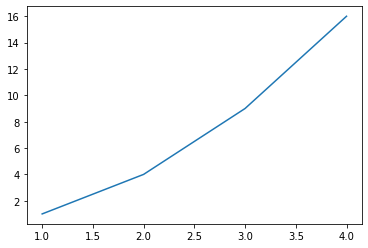

In [78]:
# x-values = 1,2,3,4
# y-values = 1,4,9,16
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
# plot wont be shown until we call:
plt.show()

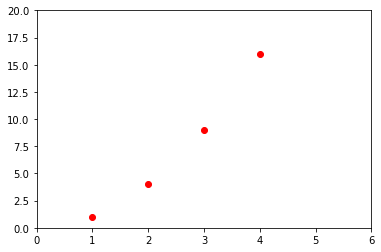

In [82]:
#We can change the plot from lines - to points o and from blue (b) to red (r).
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
#Additionally we can change the axis ranges:
# x-axis from 0--6, y-axis from 0--20 
plt.axis([0, 6, 0, 20])
plt.show()

See [here](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html%23matplotlib.pyplot.plot) for more plotting options.

### numpy
- In matplotlib were limited to working with lists.
- To get over this limitation, we will generally also import the numpy module (pronounced num-pie) to make use of numpy arrays.
- Common practice is to shorten this module name to np using 

In [84]:
import numpy as np

- See a helpful [numpy tutorial](https://cs231n.github.io/python-numpy-tutorial/)
### numpy arrays
- A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. 
    - rank The number of dimensions is the rank of the array
    - shape the shape of an array is a tuple of integers giving the size of the array along each dimension.
- Consider the following examples taken from the [pyplot tutorial](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html)

In [85]:
# Create a rank 1 array
a = np.array([1, 2, 3])
a[0] = 5 # Change an element of the array >>> 
print(a.shape) # Prints "(3,)"
a


(3,)


array([5, 2, 3])

### numpy arrays
- Create a rank 2 array using Python nested lists, and access elements using square brackets:

In [87]:
b = np.array([[1,2,3],[4,5,6]]) 
print(b.shape) # Prints "(2, 3)" >>>
b
# extract element in row 1 (index 1) and column 3 (index 2) 
b[1,2]
b[(1,2)] # can also index using a tuple
# more examples:
print(b[0,2],b[1,0])


(2, 3)
3 4


### numpy arrays indexing
- Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [93]:
b


array([[2, 3],
       [5, 6]])

In [94]:
# first row:
b[0, :]

 

array([1, 2, 3])

In [95]:
# second column
b[:,1]


array([2, 5])

In [96]:
#array([2, 5])
# first 2 rows and columns 1 and 2
b[:2, 1:3]

array([[2, 3],
       [5, 6]])

### numpy arrays
- [np.arrange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html%23numpy.arange) return evenly spaced values within a given interval. Eg, evenly sampled points between 0 and 5 at 0.2 intervals



In [ ]:
t = np.arange(0, 1, 0.2)
# array([0. , 0.2, 0.4, 0.6, 0.8])


- General usage: np.arrange(start,stop,step).
    - as before start and step defaults to 0 and 1, resp.
- There are a number of [other methods](https://numpy.org/doc/stable/user/basics.creation.html%23arrays-creation) for array creation as well:
```
>>> a = np.zeros((2,2)) # Create a 2x2 array of zeros 
>>> b = np.ones((1,2)) # Create a 1x2 array of ones 
>>> c = np.full((2,2), 7) # Creates 2x2 a array of 7s
```

### matplotlib - Bar Chart Example

![alt text](../images/07Python/catsdogs.png)


In [101]:
import matplotlib.pyplot as plt #[1] import numpy as np
# number of dogs/group
data1 = [25,45,35,20]
# number of cats/group
data2 = [35,40,25,30]
index = np.arange(len(data1)) 
bar_width = 0.35
opacity = 0.4
# cont'd on next slide


In [102]:
 # to create arrays for rect position 
index = np.arange(len(data1))
index


array([0, 1, 2, 3])

### matplotlib - Bar Chart Example

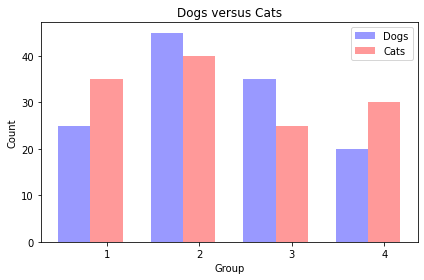

In [105]:
# continued from previous slide
rects1 = plt.bar(index, data1, bar_width, alpha=opacity,
color='b', label='Dogs')
rects2 = plt.bar(index + bar_width, data2, bar_width,
alpha=opacity, color='r', label='Cats') 
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Dogs versus Cats')
plt.xticks(index + bar_width, ('1', '2', '3', '4'))
plt.legend()
plt.tight_layout() # to remove whitespace plt.show()

In [107]:
#N.B.:
index + bar_width 

array([0.35, 1.35, 2.35, 3.35])

### Some comments
- Python starts plotting everything in the background and wont display the graph until plot.show() is called.
- matplotlib colours are given [here](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)
    - eg. rforredcforcyankforblack
    - you can also use full names ('green'), hex strings ('#008000'), or RGB/RGBA tuples ((0,1,0,1)).
- Thelabelargumentwillbeusedwhenwecallplt.legend() 􏰀 
    - the colours, and labels will be generated automatically (using the plt.x/ylabel)
    
### matplotlib - Histograms

Python [histograms](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html)


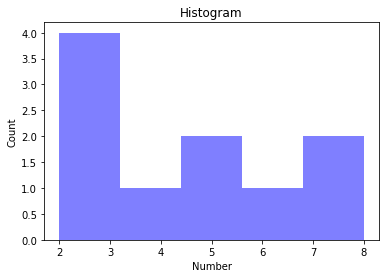

In [109]:
import numpy as np
import matplotlib.pyplot as plt
num_bins = 5
x = [5,3,8,5,2,7,2,4,6,2]
# saves output to variables
# (eg of tuple unpacking!)
n, bins, patches = plt.hist(x, num_bins,
density=False, facecolor='blue', alpha=0.5)
plt.xlabel('Number') 
plt.ylabel('Count')
plt.title('Histogram') 
plt.show()

### matplotlib - Histograms comments
- bins partition our range of values into a subsets
- Histograms count the number of observations falling into each bin 
    - n: is the number of counts in each bin of the histogram
    - bins: is the left hand edge of each bin, 
    - example: >>> bins
    - array([2. , 3.2, 4.4, 5.6, 6.8, 8. ])
- patches: is the individual patches used to create the histogram,
- e.g a collection of rectangles:
    - >>> print(patches[1])
    - Rectangle(xy=(3.2, 0), width=1.2, height=1, angle=0)
- density is a logical object that is False (or 0) if you want the y-axis to be in terms of counts, and True (or 1) when plotting the probability densities

### SciPy stats
- Another helpful module is [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- This module contains a large number of probability distributions as well as a growing library of statistical functions.
- We will use the norm.pdf compare the probability density function (pdf) or a normal distribution with random data generated from a normal distribution.
    - The [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is a bell shaped distribution with a mean (i.e. center) given my μ (or mu in the code) and a standard deviation of σ (or sigma in the code).
    - We generate random normal data using the [numpy.random.randn](https://numpy.org/doc/stable/reference/generated/numpy.random.randn.html) function (which return samples from the "standard normal"2 distribution).
- N.B. 
- we use [TeX markup](https://matplotlib.org/tutorials/text/mathtext.html) in the title eg. $\mu$ appears μ

### matplotlib - Histogram Example (2)

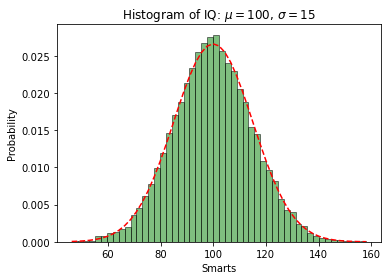

In [111]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats
mu = 100
sigma = 15
x = mu+sigma*np.random.randn(10000)
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, edgecolor="k",
density=1, facecolor='green', alpha=0.5)
y = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
plt.subplots_adjust(left=0.15)
plt.show()

```text
 Exercise

1.How does your plot change when you update the number of bins from the previous example from 50 to 10.
2.How does your plot change when you delete the edgecolor = "k"? (remember k stands for black)
3.How does your plot change when you set density to False? 
4. How does your plot change when you set the facecolor to'g'?
5. How does your plot change when you set alpha to 0.1?
```
### Try in Charts

```text
Example
Write a program to create a bar chart for this data:
series1 = [40, 50, 60, 70, 80] series2 = [70, 50, 40, 90, 30] 
Output

```
![alt text](../images/07Python/barchart.png)

### SciPy stats
- In addition the scipy.stats module has the linregress function for performing linear regression.
- The gerenal syntax is:

```
scipy.stats.linregress(x, y)
```
- The above calculate a linear least-squares regression for two sets of measurements: the explanatory variable x and the response variable y.

### SciPy [Linear Regression]( https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) Example

In [113]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
x = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])
slope, intercept, r_value, p_value,slope_std_error = stats.linregress(x, y)
#Save the resulting tuple to variables that we can use later,. . .

### SciPy [Linear Regression](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) Example
- Find the residuals, (observed y values minus the predicted y values produced by our fitted model):


In [114]:
predict_y = intercept + slope * x 
print("Predicted y-values:",predict_y)
pred_error = y - predict_y 
print("Prediction error:",pred_error)

Predicted y-values: [10.85714286 15.11428571 19.37142857 23.62857143 27.88571429 32.14285714]
Prediction error: [ 0.14285714 -1.11428571  0.62857143  0.37142857  1.11428571 -1.14285714]


- Compute the residual standard error (a measure of prediction error)

In [115]:
degr_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2)/degr_freedom) 
print("Residual error:",residual_std_error)

Residual error: 1.041976144503454


### SciPy [Linear Regression](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) Example
- Plot the raw data with the fitted regression line:

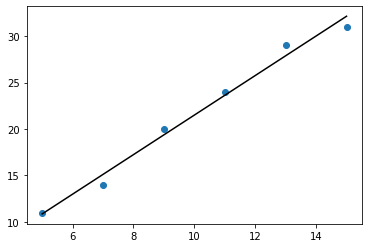

In [116]:
plt.plot(x, y, 'o') # o for points
plt.plot(x, predict_y, 'k-') # - for line, k for black
plt.show()

### SciPy - K-means Clustering
- Scipy also provides routines for conducting k-means clustering and vector quantization.
- The input of k-means algorithm:
    - k the number of clusters to generate
    - x the set of observations to cluster
- The output of k-means algorithm:
    - a set of centroids, one for each of the k clusters.
    - a classification vector: an observation is assigned to the cluster whose centroid is closest to it.
### SciPy - [K-means Clustering](https://glowingpython.blogspot.com/2012/04/k-means-clustering-with-scipy.html)

In [117]:
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
# creates a 300x2 array of data
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2))) 
# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,2)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

### Some comments
- rand(150,2) generates an np.array with 150 rows and 2 columns with random numbers from the interval (0, 1)more [here](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html )
- Alternatively, we could have used a loop and See [numpy.asarray](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html)



In [119]:
import random as rnd 
import numpy as np 
data = []
for i in range(0,100):
    data.append([rnd.random(), rnd.random()])
# need to convert to array for kmeans 
data = np.asarray(data)
data

array([[0.77954308, 0.52482256],
       [0.2197231 , 0.84319801],
       [0.68818824, 0.91141375],
       [0.58576791, 0.64746507],
       [0.35308863, 0.6502877 ],
       [0.88045119, 0.72255322],
       [0.8114223 , 0.03277539],
       [0.90070148, 0.215134  ],
       [0.65875255, 0.88001017],
       [0.80183343, 0.09432588],
       [0.27422179, 0.2495625 ],
       [0.71871457, 0.28923544],
       [0.98344889, 0.38926487],
       [0.58880354, 0.09448002],
       [0.45267982, 0.17466207],
       [0.81573283, 0.01611689],
       [0.62783206, 0.19897191],
       [0.92931085, 0.14942751],
       [0.05898619, 0.00262404],
       [0.54245114, 0.24889862],
       [0.68980389, 0.97170821],
       [0.34419016, 0.51169688],
       [0.68261513, 0.03446783],
       [0.61453711, 0.53031134],
       [0.34532851, 0.96793893],
       [0.88757832, 0.96084942],
       [0.68739712, 0.40799526],
       [0.54294633, 0.06765599],
       [0.66630018, 0.51501686],
       [0.13638777, 0.14858935],
       [0.

### Some comments
[vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) stack arrays in sequence vertically (row wise)

In [120]:
a = np.array([1, 2, 3])
b = np.array([[2, 3, 4], [5,6,7]]) 
np.vstack((a,b))

array([[1, 2, 3],
       [2, 3, 4],
       [5, 6, 7]])

```
Tip:
When you import a function named myfunction from a module named mymodule via import mymodule you need to use the dot notation, i.e. mymodule.myfunction to use it. If you import the function via from mymodule import myfunction, you can access the function by calling it directly, i.e myfunction
   
```

### Some comments
- The notation ,_ means we’ll be taking the first element of the tuple outputed from kmeans() (i.e. the k × N centroid array) and ignore the second argument.


In [123]:
# a simple example (2 gets thrown away) 
A,_ = [1,2] # A = 1
_,B = [1,2] # B=2
A,_,_ = [1,2,3] # A = 1

- Alternatively, we may think of this notation as doing the following:

In [125]:
km = kmeans(data,2)
type(km)

tuple

In [126]:
centroids = km[0]
centroids

array([[0.46809011, 0.2111649 ],
       [0.6568639 , 0.72491287]])

### SciPy - K means Clustering (2)
``` 
>>> # Move data into individual lists based on clustering 
... clusters = []
>>> for i in range(0, numclusters):
... clusters.append([[],[]])
...
  >>> clusters
  [[[], []], [[], []]]
```
- Creates a nested Pyhon list. First element is of clusters contains the data points from members assigned to group 0, the second elements contains the data pairs assigned to group 1.
```
# run after the code from the next slide:
  clusters[0][0] # x values from cluster 0 (blue)
  clusters[0][1] # y values from cluster 0 (blue)
  clusters[1][0] # x values from cluster 1 (red)
  clusters[1][1] # y values from cluster 1 (red)
```
### SciPy - K means Clustering (3)
```
for i in range(0,len(idx)):
    clusterIdx = idx[i]
    # saving the x values for 
cluster = clusterIdx 
    clusters[clusterIdx][0].append(data[i][0])
    # saving the y values for cluster = clusterIdx 
    clusters[clusterIdx][1].append(data[i][1])
# Plot data points and cluster centroids
# 'ob' for blue points (group index 0)
# 'or' for red points (group index 1) 
plt.plot(clusters[0][0],clusters[0][1],'ob',clusters[1][0],clusters[1][1],'or')
# centroids[:,0] = first column for centroid of group 0
# centroids[:,1] = second column for centroid of group 1 
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8) 
plt.show()
```
### SciPy - K means Clustering
- The plot argument ob/or stands for blue and red circle markers, resp. See more on plot formatting here.
![alt text](../images/07Python/kmeans.png)

```
Example
Write a program that uses SciPy to perform a linear regression on this data set:
x = [1, 5, 10, 15, 20, 25]
y = [-1, -12, -26, -40, -60, -73]
Output:

```
![alt text](../images/07Python/scipy.png)

### cikit-learn and BeautifulSoup
- scikit-learn (http://scikit-learn.org/) is a machine learning library for Python.
- Features:
    - classification
    - regression
    - clustering
    - dimensionality reduction
- BeautifulSoup (http://www.crummy.com/software/BeautifulSoup/) is a library to make it easy to search, navigate, and extract data from HTML and XML documents.

### Python - Databases
- [MySQL](https://www.mysql.com) is a popular open source relational database management system.
- We can access this data via Python using the mysql.connector module. See the [developer guide](https://dev.mysql.com/doc/connector-python/en/) and [W3schools](https://www.w3schools.com/python/python_mysql_getstarted.asp) tutorial for more details
    - [notes](https://dev.mysql.com/doc/connector-python/en/connector-python-example-connecting.html) on connecting
    - [notes](https://dev.mysql.com/doc/connector-python/en/connector-python-example-ddl.html) on creating tables
    - [notes](https://dev.mysql.com/doc/connector-python/en/connector-python-example-cursor-select.html) on querying
- Note that this code will require that we are on UBC secure wifi (off campus we must connect with VPN).


### Try it - Databases
``` 
 Example
Write a program that queries the WorksOn database and returns the employees grouped by title where the employee name is after 'J'. The output should display their title and the average salary for that title. Connection info:
cnx = mysql.connector.connect(user='data301', password='ubc', host='cosc304.ok.ubc.ca', database='WorksOn')
```
- output 

![alt text](../images/07Python/Database.png)

```
answer
import mysql.connector try:
cnx=mysql.connector.connect(user='data301', password='ubc', host='cosc304.ok.ubc.ca',database='WorksOn')
cursor = cnx.cursor()
query = ("SELECT title, AVG(salary) as avgSalary
FROM emp WHERE ename >= 'J' GROUP BY title") cursor.execute(query)
for (title, avgSalary) in cursor:
print(title, avgSalary) cursor.close()
except mysql.connector.Error as err: print(err)
finally: cnx.close()
 
```

### MapReduce
- Map-Reduce is a technique for processing large data sets in a functional manner. See the [Wikipedia article](https://en.wikipedia.org/wiki/MapReduce)
- The technique was invented by Google and is implemented in a variety of systems including Python, NoSQL databases, and a Big Data system called Hadoop.
- In Hadoop, map takes as input key-value pairs and outputs key-value pairs. The shuffle step will move pairs to particular machines based on keys. The reduce step takes a list of key-value pairs (with same key) and reduces to one value.
- It is possible to code map/reduce functions in Python for use in Hadoop cluster
### MapReduce
- Simpler version of Map-Reduce in Python without a cluster:
- Map function takes as input a list and a function then applies function to each element of the list to produce a new list as output
- Filter function only keeps list elements where filter function is True
- Reduce function takes result of map/filter and produces single value from list
- N.B. The reduce function has been moved to the functools module for Python3 with creator noting “99% of the time an explicit for loop is more readable"

### map
- General usage: map(function_to_apply, list_of_inputs)
- Data: a1, a2, . . . , an (could be elements in a tuple or a list)
- Function: f (x)
- Calling map(f (x), Data) would return
    - f(a1),f(a2),...f(an)


###  filter
- General usage: filter(function_to_apply, list_of_inputs) 
- Data: a1, a2, . . . , an (could be elements in a tuple or a list)
- Function: f (x ) (this function should return True or False
- Calling map(f (x), Data) would return:
    - all ai s for which f (ai ) returns True
### reduce
- General usage: reduce(function_to_apply, list_of_inputs) 
- Data: a1, a2, . . . , an (could be elements in a tuple or a list)
- Function: f(x,y)
- Calling reduce(f(x,y), Data) would perform: 
    - Step 1: val1 = f (a1, a2)
    - Step 2: val2 = f (val1, a3)
    - Step 3: val3 = f (val2, a4)
        ...
    - Step n-1 valn−1 = f (valn−2, an) and return: valn−1
    
### Python - MapReduce Example

In [155]:
import functools     # For Reduce
data = [1, 2, 3, 4, 5, 6]
def triple(x):  # function to be used with map
    return x*3
def myfilter(x): # function to be used with filter 
    if x % 2 == 0:
        return True
    return False
def sum(x, y):  # function to be used with reduce 
    return x+y


### Python - map Example

In [156]:
result = list(map(triple, data)) 
print("Result after map:",result) 

Result after map: [3, 6, 9, 12, 15, 18]


In [158]:
#To see this using a for loop:
items = [1, 2, 3, 4, 5, 6]
output = []
for i in items:
    val = triple(i)
    output.append(val)

print(output)

[3, 6, 9, 12, 15, 18]


### Python - filter Example

In [159]:
result = list(filter(myfilter, result))
print("Result after filter:",result)

Result after filter: [6, 12, 18]


In [160]:
#Alternatively using a for loop:
items = [3, 6, 9, 12, 15, 18]
output = []
for i in items:
    val = myfilter(i) 
    if val:
        output.append(i)
print(output) # returns all the even numbers

[6, 12, 18]


### Python - reduce Example

In [161]:
result = functools.reduce(sum, result) 
print("Result after reduce:",result)

Result after reduce: 36


In [162]:
#To see this using a loop:
items = [6, 12, 18]
val = items[0]
item2 = items[1:] 
for a in item2:
    val = sum(val,a)
print(val)


36


- Notice that when using map, the items in the result are values returned by the function triple.
- In contrast, the values returned by myfilter in filter(f, ...) are not outputted results themselves, but rather an index of the values that returned True.
- The values returned by the reduce function returns a single result.
### Try It - MapReduce
```
Example
Write a map-reduce program that during the map step will sub- tract 2 from each element. The reduce step should return the product of all the elements in the list.
```
### Conclusion
- Python has many libraries to help with data analysis tasks:
    - reading and write to files
    - csv module for processing CSV files
    - Biopython for bioinformatics
    - numerous chart libraries including matplotlib and ggplot 􏰀 
    - SciPy - collection of libraries for scientific computing
    - libraries for web access and parsing (BeautifulSoup)
    - database access libraries and connectors
- The try-except statement is used to handle exceptions so that the program may continue when an error condition occurs.
- Open, read, write, and close text files
- Process CSV files including using the csv module
- Define: IPv4/IPv6 address, domain, domain name, URL
- Read URLs using urllib.request.
- Define: exception, exception handling
- Use try-except statement to handle exceptions and understand how each of try, except, else, finally blocks are used
- Import Python modules
- Use Biopython module to retrieve NCBI data and perform BLAST
- Build charts using matplotlib
- Perform linear regression and k-means clustering using SciPy 
- Connect to and query the MySQL database using Python
- Write simple Map-Reduce programs
